The implementation for the updates of weights and biases for all types of regression (linear, logistic and polynomial so far) was first implemented with a batch gradient descent. Recently, a new mini-batch gradient descent algorithm was implemented in preparation for possible large datasets. 

In [29]:
import os, sys
import time

In [30]:
sys.path.append(os.path.abspath("../src"))
from train import train_slr, train_pol_reg

In [31]:
def bench(func, *args, **kwargs):
    start = time.time()
    mod = func(*args, **kwargs)
    end = time.time()
    return end - start, mod

def output(samples = 100000):
    mini_batch_bool = [False, True]
    for val in mini_batch_bool:
        runtime, mod = bench(train_slr, mini_batch = val, samples = samples)
        print(f"Runtime for SLR with Mini-Batch GD: {val} is {runtime:.4f} seconds")

    for val in mini_batch_bool:
        runtime, mod = bench(train_pol_reg, mini_batch = val)
        print(f"Runtime for PolReg with Mini-Batch GD: {val} is {runtime:.4f} seconds")

output()

y = [28.98150131]x + 0.03257857201784551 --> Mini-Batch GD: False
MSE = 25.361576437235964
Runtime for SLR with Mini-Batch GD: False is 0.2178 seconds
y = [1.46786334]x + 0.016987497395159347 --> Mini-Batch GD: True
MSE = 811.1456417011273
Runtime for SLR with Mini-Batch GD: True is 3.7844 seconds
y = [ 142.54832198  -50.05282129 1664.19461412]x + 142.5483219812984 --> Mini-Batch GD: False
MSE = 180937.81250824855
Runtime for PolReg with Mini-Batch GD: False is 0.0218 seconds
y = [ 142.61555007  -50.08313122 1664.09386319]x + 142.61555007449914 --> Mini-Batch GD: True
MSE = 180814.30318823486
Runtime for PolReg with Mini-Batch GD: True is 0.0775 seconds


y = [42.45852331]x + 0.5452457549417533 --> Mini-Batch GD: True
MSE = 21.38434100782075


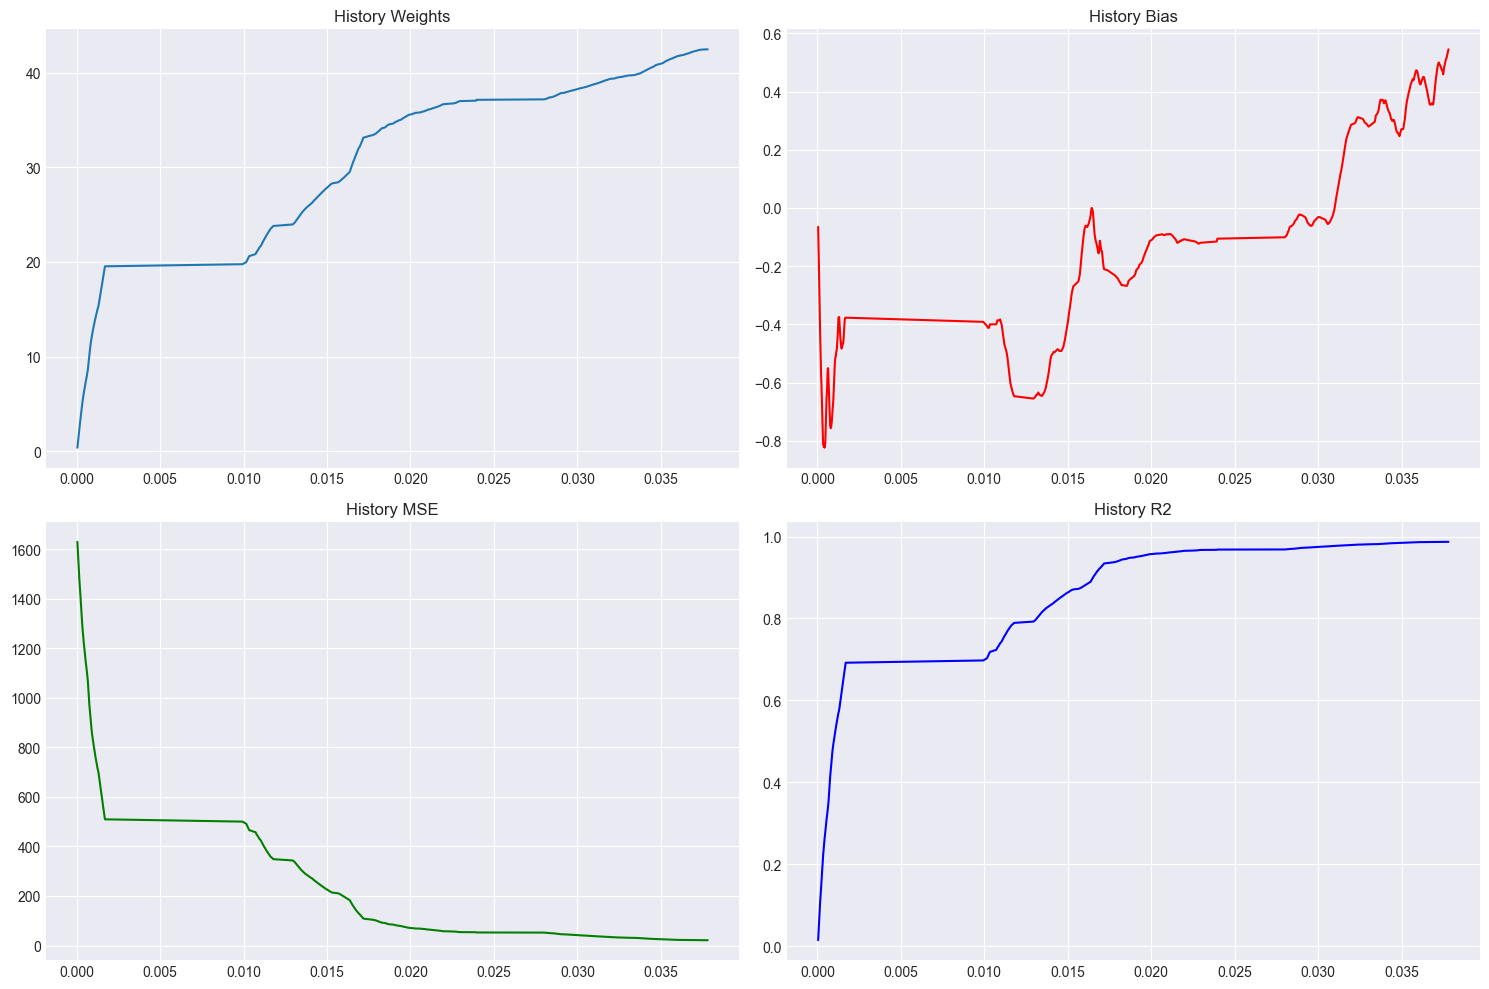

In [32]:
import matplotlib.pyplot as plt

def plot_weights_bias(model):
    fig, axs = plt.subplots(2, 2, figsize = (15, 10))
    
    for i in range(len(model.w_hist[0])):
        w_hist_i = [w[i] for w in model.w_hist]
        axs[0, 0].plot(model.time_hist, w_hist_i, label = f"Weight {i+1}")
        
    axs[0, 0].set_title("History Weights")
    axs[0, 1].plot(model.time_hist, model.b_hist, label = "Bias", color = "r")
    axs[0, 1].set_title("History Bias")
    axs[1, 0].plot(model.time_hist, model.mse_hist, label = "MSE", color = "g")
    axs[1, 0].set_title("History MSE")
    axs[1, 1].plot(model.time_hist, model.r2_hist, label = "R2", color = "b")
    axs[1, 1].set_title("History R2")

    plt.tight_layout()
    plt.show()

reg = train_slr(mini_batch = True)
plot_weights_bias(reg)

In [33]:
print(reg.r2_hist[-1])

0.9870754372289573
